In [1]:
import spacy
import pickle
import random

# Data Preparation

## 1. Importing the data

In [91]:
training_data = pickle.load(open("data/training/train_data.pkl", "rb"))

In [92]:
training_data[0]

('Govardhana K Senior Software Engineer  Bengaluru, Karnataka, Karnataka - Email me on Indeed: indeed.com/r/Govardhana-K/ b2de315d95905b68  Total IT experience 5 Years 6 Months Cloud Lending Solutions INC 4 Month • Salesforce Developer Oracle 5 Years 2 Month • Core Java Developer Languages Core Java, Go Lang Oracle PL-SQL programming, Sales Force Developer with APEX.  Designations & Promotions  Willing to relocate: Anywhere  WORK EXPERIENCE  Senior Software Engineer  Cloud Lending Solutions -  Bangalore, Karnataka -  January 2018 to Present  Present  Senior Consultant  Oracle -  Bangalore, Karnataka -  November 2016 to December 2017  Staff Consultant  Oracle -  Bangalore, Karnataka -  January 2014 to October 2016  Associate Consultant  Oracle -  Bangalore, Karnataka -  November 2012 to December 2013  EDUCATION  B.E in Computer Science Engineering  Adithya Institute of Technology -  Tamil Nadu  September 2008 to June 2012  https://www.indeed.com/r/Govardhana-K/b2de315d95905b68?isid=rex-

In [96]:
def dataConverter(training_data):
    formatted_train_data = []
    for data in training_data:
#         print(data)
        formatted_train_data.append(tuple([(data[0]), data[1]['entities']]))
    return formatted_train_data

trainData = dataConverter(training_data)
trainData[:2]

[('Govardhana K Senior Software Engineer  Bengaluru, Karnataka, Karnataka - Email me on Indeed: indeed.com/r/Govardhana-K/ b2de315d95905b68  Total IT experience 5 Years 6 Months Cloud Lending Solutions INC 4 Month • Salesforce Developer Oracle 5 Years 2 Month • Core Java Developer Languages Core Java, Go Lang Oracle PL-SQL programming, Sales Force Developer with APEX.  Designations & Promotions  Willing to relocate: Anywhere  WORK EXPERIENCE  Senior Software Engineer  Cloud Lending Solutions -  Bangalore, Karnataka -  January 2018 to Present  Present  Senior Consultant  Oracle -  Bangalore, Karnataka -  November 2016 to December 2017  Staff Consultant  Oracle -  Bangalore, Karnataka -  January 2014 to October 2016  Associate Consultant  Oracle -  Bangalore, Karnataka -  November 2012 to December 2013  EDUCATION  B.E in Computer Science Engineering  Adithya Institute of Technology -  Tamil Nadu  September 2008 to June 2012  https://www.indeed.com/r/Govardhana-K/b2de315d95905b68?isid=rex

## 2. Conversion of Data into .Spacy format

In [107]:
import spacy
from spacy.tokens import DocBin

nlp = spacy.blank("en")
'''
training_data = [
  ("Tokyo Tower is 333m tall.", [(0, 11, "BUILDING")]),
]
'''
# the DocBin will store the example documents
db = DocBin()

for text, annotations in trainData:
    doc = nlp(text)
    ents = []
    for start, end, label in annotations:
        span = doc.char_span(start, end, label=label)
        if span is None:
            continue
        ents.append(span)
        # print(type(span))
        # print(start, end, label)
        # print(span)
    #doc.ents = ents
    filtered = filter_spans(ents) # THIS DOES THE TRICK
    pat_filt =len(filtered)
    doc.ents = filtered

    db.add(doc)
db.to_disk("./train.spacy")

### Filling the config file

In [ ]:
python -m spacy init fill-config base_config.cfg config.cfg

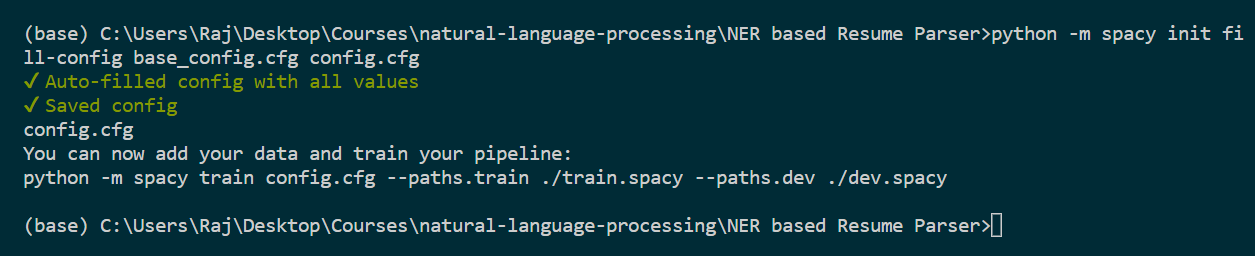

### Training Model

In [ ]:
python -m spacy train config.cfg --output ./output --paths.train ./train.spacy --paths.dev ./train.spacy

- Reference:https://kgptalkie.com/resume-and-cv-summarization/


In [109]:
import os
os.environ['KMP_DUPLICATE_LIB_OK']='True'

In [110]:
!python -m spacy train config.cfg --output ./output --paths.train ./train.spacy --paths.dev ./train.spacy

[i] Saving to output directory: output
[i] Using CPU

=========================== Initializing pipeline ===========================
[+] Initialized pipeline

============================= Training pipeline =============================
[i] Pipeline: ['tok2vec', 'ner']
[i] Initial learn rate: 0.001
E    #       LOSS TOK2VEC  LOSS NER  ENTS_F  ENTS_P  ENTS_R  SCORE 
---  ------  ------------  --------  ------  ------  ------  ------
  0       0          0.00    208.33    0.00    0.00    0.00    0.00
[!] Aborting and saving the final best model. Encountered exception:
ValueError("[E024] Could not find an optimal move to supervise the parser.
Usually, this means that the model can't be updated in a way that's valid and
satisfies the correct annotations specified in the GoldParse. For example, are
all labels added to the model? If you're training a named entity recognizer,
also make sure that none of your annotated entity spans have leading or trailing
whitespace or punctuation. You can als

[2023-04-11 03:00:21,978] [INFO] Set up nlp object from config
[2023-04-11 03:00:21,991] [INFO] Pipeline: ['tok2vec', 'ner']
[2023-04-11 03:00:21,992] [INFO] Created vocabulary
[2023-04-11 03:00:21,992] [INFO] Finished initializing nlp object
[2023-04-11 03:00:26,325] [INFO] Initialized pipeline components: ['tok2vec', 'ner']
Traceback (most recent call last):
  File "C:\Users\Raj\anaconda3\lib\runpy.py", line 197, in _run_module_as_main
    return _run_code(code, main_globals, None,
  File "C:\Users\Raj\anaconda3\lib\runpy.py", line 87, in _run_code
    exec(code, run_globals)
  File "C:\Users\Raj\anaconda3\lib\site-packages\spacy\__main__.py", line 4, in <module>
    setup_cli()
  File "C:\Users\Raj\anaconda3\lib\site-packages\spacy\cli\_util.py", line 74, in setup_cli
    command(prog_name=COMMAND)
  File "C:\Users\Raj\anaconda3\lib\site-packages\click\core.py", line 1128, in __call__
    return self.main(*args, **kwargs)
  File "C:\Users\Raj\anaconda3\lib\site-packages\typer\core.p

In [111]:
!python -m spacy debug data

Usage: python -m spacy debug data [OPTIONS] CONFIG_PATH
Try 'python -m spacy debug data --help' for help.

Error: Missing argument 'CONFIG_PATH'.


In [112]:
!python -m spacy debug data --help

Usage: python -m spacy debug data [OPTIONS] CONFIG_PATH

  Analyze, debug and validate your training and development data. Outputs
  useful stats, and can help you find problems like invalid entity
  annotations, cyclic dependencies, low data labels and more.

  DOCS: https://spacy.io/api/cli#debug-data

Arguments:
  CONFIG_PATH  Path to config file  [required]

Options:
  -c, --code-path, --code PATH  Path to Python file with additional code
                                (registered functions) to be imported
  -IW, --ignore-warnings        Ignore warnings, only show stats and errors
  -V, --verbose                 Print additional information and explanations
  -NF, --no-format              Don't pretty-print the results
  --help                        Show this message and exit.
